<a href="https://colab.research.google.com/github/meetAmarAtGithub/Reva_MachineLearning/blob/main/DecissionTree_Default_On_Payment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

import matplotlib.pyplot as plt

#Import SK Learn model for doing ML Modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn import  metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from pandas.core.arrays.sparse import dtype

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/Reva/4_MachineLearning"

/content/gdrive/My Drive/Colab Notebooks/Reva/4_MachineLearning


In [ ]:
df= pd.read_csv("Default_On_Payment.csv")
df.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,100015.0,A14,27,A32,A40,2570,A61,A73,3.0,A92,...,A121,21.0,A143,A151,1.0,A173,1.0,A191,A201,1.0
1,100031.0,A11,12,A34,A43,385,A61,A74,4.0,A92,...,A121,58.0,A143,A152,4.0,A172,1.0,A192,A201,0.0
2,100046.0,A12,13,A34,A43,882,A61,A72,4.0,A93,...,A121,23.0,A143,A152,2.0,A173,1.0,A191,A201,0.0
3,100103.0,A14,24,A32,A40,1393,A61,A73,2.0,A93,...,A121,31.0,A143,A152,1.0,A173,1.0,A192,A201,0.0
4,100104.0,A11,24,A32,A40,3123,A61,A72,4.0,A92,...,A122,27.0,A143,A152,1.0,A173,1.0,A191,A201,1.0


## Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40121 entries, 0 to 40120
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  40120 non-null  float64
 1   Status_Checking_Acc          40121 non-null  object 
 2   Duration_in_Months           40121 non-null  object 
 3   Credit_History               40121 non-null  object 
 4   Purposre_Credit_Taken        40120 non-null  object 
 5   Credit_Amount                40120 non-null  object 
 6   Savings_Acc                  40120 non-null  object 
 7   Years_At_Present_Employment  40120 non-null  object 
 8   Inst_Rt_Income               40120 non-null  float64
 9   Marital_Status_Gender        40120 non-null  object 
 10  Other_Debtors_Guarantors     40120 non-null  object 
 11  Current_Address_Yrs          40120 non-null  float64
 12  Property                     40119 non-null  object 
 13  Age             

In [ ]:
#get number of rows/observations
print ("Rows     : " , df.shape[0])  

Rows     :  40121


In [ ]:
#get number of columns
print ("Columns  : " , df.shape[1]) 

Columns  :  22


In [ ]:
#get name of columns/features
print ("#"*50,"\n","Features : \n\n", df.columns.tolist()) 

################################################## 
 Features : 

 ['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months', 'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount', 'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income', 'Marital_Status_Gender', 'Other_Debtors_Guarantors', 'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ', 'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker', 'Default_On_Payment']


In [ ]:
print ("#"*20,"\nMissing values :\n\n", df.isnull().sum().sort_values(ascending=False))

#################### 
Missing values :

 Default_On_Payment             2
Property                       2
Foreign_Worker                 2
Telephone                      2
Dependents                     2
Job                            2
Num_CC                         2
Housing                        2
Other_Inst_Plans               2
Age                            2
Customer_ID                    1
Other_Debtors_Guarantors       1
Marital_Status_Gender          1
Inst_Rt_Income                 1
Years_At_Present_Employment    1
Savings_Acc                    1
Credit_Amount                  1
Purposre_Credit_Taken          1
Current_Address_Yrs            1
Status_Checking_Acc            0
Credit_History                 0
Duration_in_Months             0
dtype: int64


In [ ]:
#  count of unique values
print ("#"*20,"\nUnique values :  \n\n", df.nunique())  

#################### 
Unique values :  

 Customer_ID                    39133
Status_Checking_Acc                5
Duration_in_Months                67
Credit_History                     6
Purposre_Credit_Taken             11
Credit_Amount                   1843
Savings_Acc                        6
Years_At_Present_Employment        6
Inst_Rt_Income                     4
Marital_Status_Gender              5
Other_Debtors_Guarantors           4
Current_Address_Yrs                5
Property                           4
Age                               53
Other_Inst_Plans                   3
Housing                            3
Num_CC                             4
Job                                4
Dependents                         2
Telephone                          2
Foreign_Worker                     2
Default_On_Payment                 2
dtype: int64


## Data Cleaning

In [ ]:
df.shape

(40121, 22)

In [ ]:
#Drop NA
df =df.dropna()
df.shape

(40119, 22)

In [ ]:
#Dropping customer id field as it is unique field and no relation with default payment
df = df.drop(['Customer_ID'],axis=1)
df.head(5)

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,A14,27,A32,A40,2570,A61,A73,3.0,A92,A101,...,A121,21.0,A143,A151,1.0,A173,1.0,A191,A201,1.0
1,A11,12,A34,A43,385,A61,A74,4.0,A92,A101,...,A121,58.0,A143,A152,4.0,A172,1.0,A192,A201,0.0
2,A12,13,A34,A43,882,A61,A72,4.0,A93,A103,...,A121,23.0,A143,A152,2.0,A173,1.0,A191,A201,0.0
3,A14,24,A32,A40,1393,A61,A73,2.0,A93,A103,...,A121,31.0,A143,A152,1.0,A173,1.0,A192,A201,0.0
4,A11,24,A32,A40,3123,A61,A72,4.0,A92,A101,...,A122,27.0,A143,A152,1.0,A173,1.0,A191,A201,1.0


### Converting  "Duration_in_Months" and "Credit_Amount" column types to Numeric and Float respectively.

In [ ]:
df['Duration_in_Months']=pd.to_numeric(df.Duration_in_Months,errors='coerce')

In [ ]:
df['Credit_Amount']=pd.to_numeric(df.Credit_Amount,downcast="float",errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40119 entries, 0 to 40119
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Status_Checking_Acc          40119 non-null  object 
 1   Duration_in_Months           40119 non-null  int64  
 2   Credit_History               40119 non-null  object 
 3   Purposre_Credit_Taken        40119 non-null  object 
 4   Credit_Amount                40119 non-null  float32
 5   Savings_Acc                  40119 non-null  object 
 6   Years_At_Present_Employment  40119 non-null  object 
 7   Inst_Rt_Income               40119 non-null  float64
 8   Marital_Status_Gender        40119 non-null  object 
 9   Other_Debtors_Guarantors     40119 non-null  object 
 10  Current_Address_Yrs          40119 non-null  float64
 11  Property                     40119 non-null  object 
 12  Age                          40119 non-null  float64
 13  Other_Inst_Plans

In [ ]:
numeric_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
numeric_var_names

['Duration_in_Months',
 'Credit_Amount',
 'Inst_Rt_Income',
 'Current_Address_Yrs',
 'Age',
 'Num_CC',
 'Dependents',
 'Default_On_Payment']

In [ ]:
#Removing  ['Default_On_Payment'] target from input parameters
numeric_var_names.pop()
numeric_var_names

['Duration_in_Months',
 'Credit_Amount',
 'Inst_Rt_Income',
 'Current_Address_Yrs',
 'Age',
 'Num_CC',
 'Dependents']

In [ ]:
cat_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]
cat_var_names

['Status_Checking_Acc',
 'Credit_History',
 'Purposre_Credit_Taken',
 'Savings_Acc',
 'Years_At_Present_Employment',
 'Marital_Status_Gender',
 'Other_Debtors_Guarantors',
 'Property',
 'Other_Inst_Plans ',
 'Housing',
 'Job',
 'Telephone',
 'Foreign_Worker']

In [ ]:
#numeric_var_names.pop() #Removing "Dependents" as it is not required scaling

x_num=df.loc[:,(numeric_var_names)]
x_num.tail(5)

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents
40115,24,1285.0,4.0,4.0,32.0,1.0,1.0
40116,24,1935.0,4.0,4.0,31.0,2.0,1.0
40117,60,14027.0,4.0,2.0,27.0,1.0,1.0
40118,36,3804.0,4.0,1.0,42.0,1.0,1.0
40119,20,2235.0,4.0,2.0,33.0,2.0,1.0


In [ ]:
x_num.shape

(40119, 7)

In [ ]:
#Dummy coding for categorical variables
for x in df.columns:
    if df[x].dtype == "object":
        df[x] =pd.Categorical(df[x]).codes

In [ ]:
x_num1=df.loc[:,(cat_var_names)]
x_num1.tail(5)

,Status_Checking_Acc,Credit_History,Purposre_Credit_Taken,Savings_Acc,Years_At_Present_Employment,Marital_Status_Gender,Other_Debtors_Guarantors,Property,Other_Inst_Plans,Housing,Job,Telephone,Foreign_Worker
40115,0,2,0,4,3,1,0,3,2,0,2,0,0
40116,1,4,9,0,4,0,0,0,2,1,2,1,0
40117,1,2,0,0,3,2,0,3,2,1,3,1,0
40118,1,0,4,0,2,1,0,2,2,1,2,1,0
40119,0,4,0,0,2,3,2,1,0,0,2,0,1


In [ ]:
x_num1.shape

(40119, 13)

In [ ]:
x=pd.concat([x_num1,x_num],axis=1)
x.tail(5)

,Status_Checking_Acc,Credit_History,Purposre_Credit_Taken,Savings_Acc,Years_At_Present_Employment,Marital_Status_Gender,Other_Debtors_Guarantors,Property,Other_Inst_Plans,Housing,Job,Telephone,Foreign_Worker,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents
40115,0,2,0,4,3,1,0,3,2,0,2,0,0,24,1285.0,4.0,4.0,32.0,1.0,1.0
40116,1,4,9,0,4,0,0,0,2,1,2,1,0,24,1935.0,4.0,4.0,31.0,2.0,1.0
40117,1,2,0,0,3,2,0,3,2,1,3,1,0,60,14027.0,4.0,2.0,27.0,1.0,1.0
40118,1,0,4,0,2,1,0,2,2,1,2,1,0,36,3804.0,4.0,1.0,42.0,1.0,1.0
40119,0,4,0,0,2,3,2,1,0,0,2,0,1,20,2235.0,4.0,2.0,33.0,2.0,1.0


In [ ]:
# Checking target label "Default_On_Payment"not present in Features.
if 'Default_On_Payment' in x.columns:
  print('Default_On_Payment present')
else:
  print('Not present')

Not present


In [ ]:
x.shape

(40119, 20)

In [ ]:
#Preparing target label
y=df['Default_On_Payment']
y.shape

(40119,)

## Train Model

In [ ]:
#Create training and test data
train_x,test_x,train_y,test_y= train_test_split(x,y,test_size=0.2,random_state=999)

In [ ]:
train_x.shape

(32095, 20)

In [ ]:
train_y.shape

(32095,)

In [ ]:
test_x.shape

(8024, 20)

In [ ]:
test_y.shape

(8024,)

In [ ]:
myTree = tree.DecisionTreeClassifier(random_state=99, class_weight='balanced')
myTree

DecisionTreeClassifier(class_weight='balanced', random_state=99)

In [ ]:
my_max_depth = [2,3,4]
my_criterion = ['gini','entropy']
my_min_sample_leaf = [2,5,10,15]
my_min_sample_split = [2,5,10,15]

In [ ]:
grid = GridSearchCV(estimator=myTree, cv=5, scoring='recall', 
                    param_grid= dict(max_depth = my_max_depth, criterion= my_criterion ,
                                     min_samples_leaf = my_min_sample_leaf, min_samples_split = my_min_sample_split))

In [ ]:
grid.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=99),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'min_samples_leaf': [2, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='recall')

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

## Test Model Performance

In [ ]:
predicted = grid.predict(test_x)

In [ ]:
#Evaluate model perfomance
from sklearn import metrics
print(metrics.classification_report(test_y, predicted))

              precision    recall  f1-score   support

         0.0       0.91      0.65      0.76      5617
         1.0       0.51      0.85      0.63      2407

    accuracy                           0.71      8024
   macro avg       0.71      0.75      0.69      8024
weighted avg       0.79      0.71      0.72      8024



## <font color="blue">1.	Work with the German Credit cards data to build a decision tree with the hyperparameter optimization and report your precision and recall for the defaulters.</font> [5 Marks]

#### <font color="green">So, Precission and Recall for Non-defaulter (0) is 91% and 65% respectively.</font>

#### <font color="green">and Precission and Recall for Loan Defaulter (1) is 51% and 85% respectively.</font>

## <font color="blue">2.	If you do not have the recall of 80% for the defaulters, please optimize the threshold to get to that level. What threshold you chose and why?</font> [5 Marks]

Loan Defaulter Recall is already 85%. It is way high than 80% and good accuracy using current Hyper parameters. But, Non-defaulter Recall and Precission results are not good. Hence, further optimization is necessary.

In [ ]:
my_max_depth = [2,3,4,5,10,15]
my_criterion = ['gini','entropy']
my_min_sample_leaf = [2]
my_min_sample_split = [2]

In [ ]:
grid = GridSearchCV(estimator=myTree, cv=5, scoring='recall', 
                    param_grid= dict(max_depth = my_max_depth, criterion= my_criterion ,
                                     min_samples_leaf = my_min_sample_leaf, min_samples_split = my_min_sample_split))

In [ ]:
grid.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=99),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 10, 15],
                         'min_samples_leaf': [2], 'min_samples_split': [2]},
             scoring='recall')

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [ ]:
predicted = grid.predict(test_x)

In [ ]:
#Evaluate model perfomance
from sklearn import metrics
print(metrics.classification_report(test_y, predicted))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5617
         1.0       0.98      1.00      0.99      2407

    accuracy                           0.99      8024
   macro avg       0.99      0.99      0.99      8024
weighted avg       0.99      0.99      0.99      8024



### <font color="green">So, model performance increased significantly by increasing Decission Tree depth. From, the earlier test it was evident, by increasing</font> <font color="orange">min_samples_leaf</font> <font color="green">and</font> <font color="orange">min_samples_split</font> <font color="green"> model performance is not going to improove, as in the previous case it was given 2 as best figure. criterion is already given as <font color="orange">gini</font> and there is no point in using <font color="orange">log_loss</font>, as this is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of a logistic model. Hence, it is <font color="orange">depth</font> by incresing which we can assess model performance. We got very good result with depth level of <font color="orange">15</font>. Defaulter, Recall is <font color="orange">1</font>.

## <font color="blue">3.	What are the most important features to predict the default?</font> [5 Marks]

In [ ]:
np.round(grid.best_estimator_.feature_importances_,2)

array([0.18, 0.04, 0.05, 0.04, 0.06, 0.02, 0.03, 0.07, 0.02, 0.  , 0.03,
       0.01, 0.  , 0.08, 0.11, 0.03, 0.04, 0.12, 0.03, 0.01])

In [ ]:
grid.best_estimator_.feature_importances_.sum()

0.9999999999999999

In [ ]:
train_x.columns

Index(['Status_Checking_Acc', 'Credit_History', 'Purposre_Credit_Taken',
       'Savings_Acc', 'Years_At_Present_Employment', 'Marital_Status_Gender',
       'Other_Debtors_Guarantors', 'Property', 'Other_Inst_Plans ', 'Housing',
       'Job', 'Telephone', 'Foreign_Worker', 'Duration_in_Months',
       'Credit_Amount', 'Inst_Rt_Income', 'Current_Address_Yrs', 'Age',
       'Num_CC', 'Dependents'],
      dtype='object')

## <font color="green">The most important feature is 

1.   Status_Checking_Acc - 18%
2.   Age - 12%
3.   Credit_Amount -11%
</font>





## <font color="blue">4.	Submit the final DT with the optimized parameters and submit that along with your findings and HTML code. What are your conclusions? </font>[5 Marks]

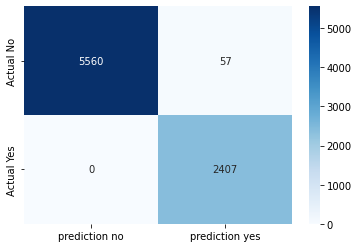

In [ ]:
conf_mtrx = metrics.confusion_matrix(test_y,predicted)
sns.heatmap(conf_mtrx, cmap='Blues', xticklabels=['prediction no','prediction yes'], yticklabels=['Actual No','Actual Yes'],annot=True, fmt='d')
plt.show()

## <font color="green">Non-Defaulter,       Precission - 1.00,      Recall -0.99,      f1-score - 0.99,      out of 5617 Non-Defaulters. <br> Defaulter,       Precission - 0.98,      Recall - 1,      f1-score - 0.99,      out of 2407 Defaulters.<br> Recall, sometimes referred to as 'sensitivity', is the fraction of retrieved instances among all relevant instances. A perfect classifier has precision and recall both equal to 1. <br> Above result shows our model is near to perfect. <br> The f1-score (or Harmonic mean of Precession and Recall) 0.99 refers , our model is pretty accurate.</font>

## <font color="green">Final Optimized parameters are  - <br>criterion : gini, </font>
## <font color="green">max_depth : 15, </font>
## <font color="green">min_samples_leaf : 2, </font>
## <font color="green">min_samples_split : 2 </font>